### One specific scenario

Current working directory: /Users/pieterbecking/Desktop/Boeing-ADM-DRL-Github/notebooks_utils
Relative path: ../data/TEMP/2ac-2-demo/Scenario_00005
Absolute path: /Users/pieterbecking/Desktop/Boeing-ADM-DRL-Github/data/TEMP/2ac-2-demo/Scenario_00005
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
2024-09-23 07:00:00


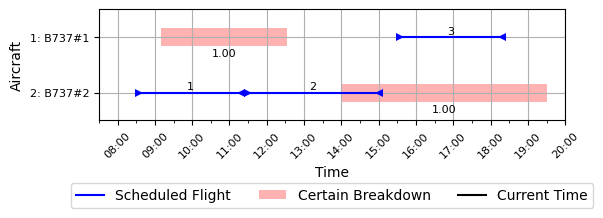

In [21]:
from scripts.visualizations import StatePlotterDemo
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime


env_type = 'myopic'


# Add these debug prints at the start
import os

# Set the scenario and root folder
data_root_folder = "../data/TEMP/2ac-2-demo/"
scenario_name = 'Scenario_00005'

# Debug prints
print("Current working directory:", os.getcwd())
print("Relative path:", os.path.join(data_root_folder, scenario_name))
print("Absolute path:", os.path.abspath(os.path.join(data_root_folder, scenario_name)))

# Check if parent directories exist
if not os.path.exists("../Data"):
    print("../Data directory does not exist")
if not os.path.exists("../Data/Training"):
    print("../Data/Training directory does not exist")
if not os.path.exists(data_root_folder):
    print(f"Data root folder does not exist: {data_root_folder}")

# Verify that the scenario exists
if not os.path.exists(os.path.join(data_root_folder, scenario_name)):
    raise FileNotFoundError('The scenario does not exist at ', os.path.join(data_root_folder, scenario_name))
# Run the visualization for the scenario
data_dict = load_scenario_data(data_root_folder + scenario_name)

# Extract necessary data for the environment
aircraft_dict = data_dict['aircraft']
flights_dict = data_dict['flights']
rotations_dict = data_dict['rotations']
alt_aircraft_dict = data_dict['alt_aircraft']
config_dict = data_dict['config']

print(config_dict)

# Initialize the environment
env = AircraftDisruptionEnv(aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict,  env_type=env_type)


# Create StatePlotter object for visualizing the environment state
state_plotter = StatePlotterDemo(
    aircraft_dict=env.aircraft_dict,
    flights_dict=env.flights_dict,
    rotations_dict=env.rotations_dict,
    alt_aircraft_dict=env.alt_aircraft_dict,
    start_datetime=env.start_datetime,
    end_datetime=env.end_datetime,
    uncertain_breakdowns=env.uncertain_breakdowns,
)



# Define the recovery period based on provided configuration
start_date = config_dict['RecoveryPeriod']['StartDate']
start_time = config_dict['RecoveryPeriod']['StartTime']
end_date = config_dict['RecoveryPeriod']['EndDate']
end_time = config_dict['RecoveryPeriod']['EndTime']
start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

#  def plot_state(self, flights_dict, swapped_flights, environment_delayed_flights, cancelled_flights, current_datetime):
# Create the plotter object
print(env.current_datetime)
state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)


### A whole folder (like the training set)

Processing scenario: Scenario_00005
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_00005
*** current_plot_current_datetime: 2024-09-23 08:00:00


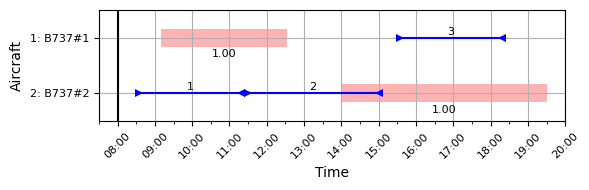

Processing scenario: Scenario_00006
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_00006
*** current_plot_current_datetime: 2024-09-23 09:00:00


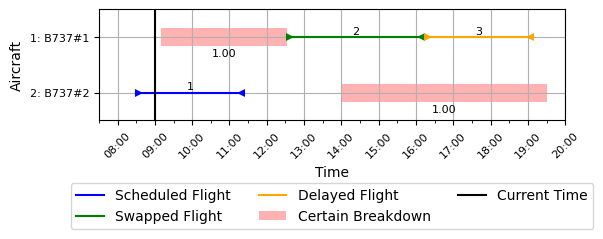

Processing scenario: Scenario_00007
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_00007
*** current_plot_current_datetime: 2024-09-23 08:00:00


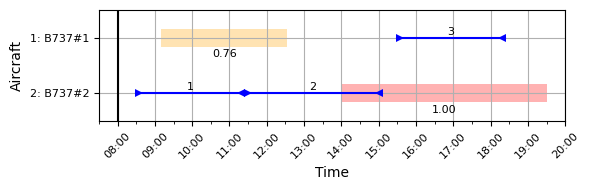

Processing scenario: Scenario_00008
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_00008
*** current_plot_current_datetime: 2024-09-23 09:00:00


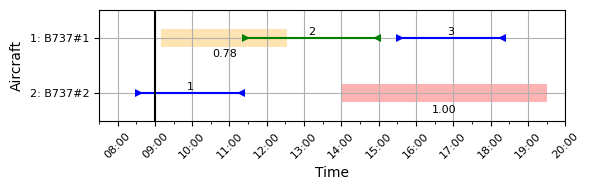

Processing scenario: Scenario_00009
{'RecoveryPeriod': {'StartDate': '23/09/24', 'StartTime': '7:00', 'EndDate': '23/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_00009
*** current_plot_current_datetime: 2024-09-23 10:00:00


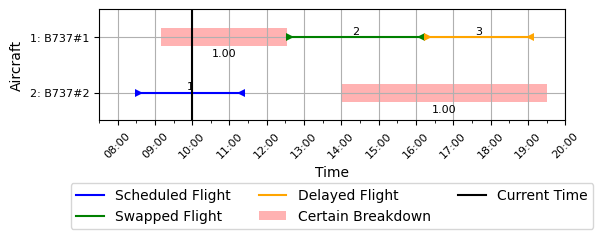

All scenarios processed successfully.


In [22]:
from scripts.visualizations import StatePlotterDemo
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime

env_type = 'myopic'


# Verify that the root folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError(f"The data root folder does not exist: {data_root_folder}")

# Get the list of scenarios, sorted by name in ascending order
scenarios = sorted(
    [scenario for scenario in os.listdir(data_root_folder) if os.path.isdir(os.path.join(data_root_folder, scenario))]
)

# Process each scenario
for scenario_name in scenarios:
    scenario_path = os.path.join(data_root_folder, scenario_name)
    
    print(f"Processing scenario: {scenario_name}")

    # Verify that the scenario exists
    if not os.path.exists(scenario_path):
        print(f"Scenario {scenario_name} does not exist. Skipping...")
        continue

    # Load scenario data
    data_dict = load_scenario_data(scenario_path)

    # Extract necessary data for the environment
    aircraft_dict = data_dict['aircraft']
    flights_dict = data_dict['flights']
    rotations_dict = data_dict['rotations']
    alt_aircraft_dict = data_dict['alt_aircraft']
    config_dict = data_dict['config']

    # Print configuration details for verification
    print(config_dict)

    # Initialize the environment
    env = AircraftDisruptionEnv(
        aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict, env_type=env_type
    )
    
    # Create StatePlotter object for visualizing the environment state
    state_plotter = StatePlotterDemo(
        aircraft_dict=env.aircraft_dict,
        flights_dict=env.flights_dict,
        rotations_dict=env.rotations_dict,
        alt_aircraft_dict=env.alt_aircraft_dict,
        start_datetime=env.start_datetime,
        end_datetime=env.end_datetime,
        uncertain_breakdowns=env.uncertain_breakdowns,
    )

    # Define the recovery period based on provided configuration
    start_date = config_dict['RecoveryPeriod']['StartDate']
    start_time = config_dict['RecoveryPeriod']['StartTime']
    end_date = config_dict['RecoveryPeriod']['EndDate']
    end_time = config_dict['RecoveryPeriod']['EndTime']
    start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

    # Plot the state for the current scenario
    print(f"Plotting state for scenario: {scenario_name}")
    
    # Hardcode scenario-specific values
    if scenario_name == "Scenario_00005":
        current_plot_swapped_flights = []
        current_plot_environment_delayed_flights = []
        current_plot_cancelled_flights = set()
        current_plot_current_datetime = datetime(2024, 9, 23, 8, 0, 0)
        current_plot_legend = False
    elif scenario_name == "Scenario_00006":
        current_plot_swapped_flights = [(2, 'B737#1')]
        current_plot_environment_delayed_flights = [3]
        current_plot_cancelled_flights = set()
        current_plot_current_datetime = datetime(2024, 9, 23, 9, 0, 0)
        current_plot_legend = True
    elif scenario_name == "Scenario_00007":
        current_plot_swapped_flights = []
        current_plot_environment_delayed_flights = []
        current_plot_cancelled_flights = set()
        current_plot_current_datetime = datetime(2024, 9, 23, 8, 0, 0)
        current_plot_legend = False
    elif scenario_name == "Scenario_00008":
        current_plot_swapped_flights = [(2, 'B737#1')]
        current_plot_environment_delayed_flights = []
        current_plot_cancelled_flights = set()
        current_plot_current_datetime = datetime(2024, 9, 23, 9, 0, 0)
        current_plot_legend = False
    elif scenario_name == "Scenario_00009":
        current_plot_swapped_flights = [(2, 'B737#1')]
        current_plot_environment_delayed_flights = [3]
        current_plot_cancelled_flights = {}
        current_plot_current_datetime = datetime(2024, 9, 23, 10, 0, 0)
        current_plot_legend = True
    else:
        current_plot_swapped_flights = []
        current_plot_environment_delayed_flights = []
        current_plot_cancelled_flights = set()
        current_plot_current_datetime = datetime(2024, 9, 23, 8, 0, 0)
        current_plot_legend = True

    # current_plot_current_datetime = env.current_datetime
    print(f"*** current_plot_current_datetime: {current_plot_current_datetime}")

    state_plotter.plot_state(flights_dict, current_plot_swapped_flights, current_plot_environment_delayed_flights, current_plot_cancelled_flights, current_plot_current_datetime, legend=current_plot_legend)

print("All scenarios processed successfully.")


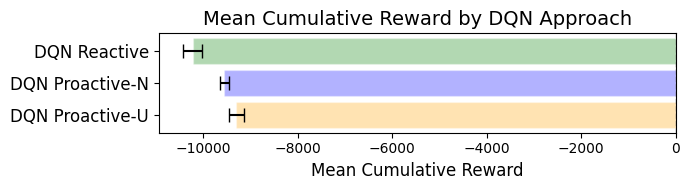

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Mean and standard deviation values for rewards
mean_rewards = [-9300.03, -9549.92, -10218.58]  # [Proactive-U, Proactive-N, Reactive]
std_rewards = [156.00, 103.74, 201.43]

# Mean and standard deviation values for runtime (in seconds, for example)
mean_runtime = [0.004303, 0.004388, 0.004384]   # [Proactive-U, Proactive-N, Reactive]
std_runtime = [4.81e-05, 1.33e-05, 7.46e-06]

# Corresponding colors for the approaches
labels = ['DQN Proactive-U', 'DQN Proactive-N', 'DQN Reactive']
bar_colors = ['orange', 'blue', 'green']

y = np.arange(len(labels))  # the label locations

# Create figure with two subplots side by side
fig, ax1 = plt.subplots(1, 1, figsize=(7, 2))

# Plot rewards in first subplot
bars = ax1.barh(y, mean_rewards, xerr=std_rewards, capsize=5, color=bar_colors, edgecolor='white', alpha=0.3)
ax1.set_xlabel('Mean Cumulative Reward', fontsize=12)
ax1.set_yticks(y)
ax1.set_yticklabels(labels, fontsize=12)
ax1.axvline(x=0, color='gray', linewidth=1, linestyle='--')
ax1.set_title('Mean Cumulative Reward by DQN Approach', fontsize=14)
ax1.grid(alpha=0)

# # Plot runtime in second subplot
# ax2.barh(y, mean_runtime, xerr=std_runtime, capsize=5, color=bar_colors, edgecolor='black', alpha=0.8)
# ax2.set_xlabel('Mean Runtime (seconds)', fontsize=12)
# ax2.set_yticks(y)
# ax2.set_yticklabels(labels, fontsize=12)
# ax2.set_title('Mean Runtime by DQN Approach', fontsize=14, fontweight='bold')
# ax2.grid(alpha=0)

# Adjust layout for a nicer fit
plt.tight_layout()
plt.show()


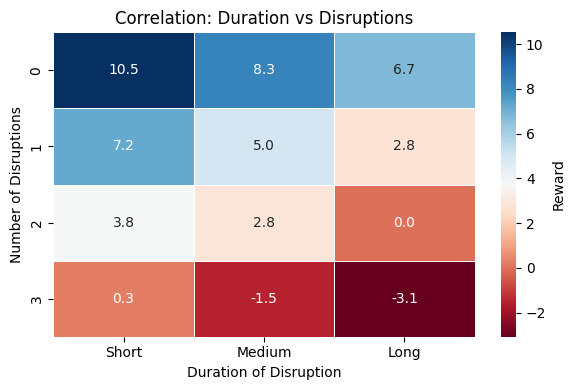

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define categories for x (duration of disruption) and y (number of disruptions)
durations = ['Short', 'Medium', 'Long']
disruptions = [0, 1, 2, 3]

# Create a reward matrix with decreasing rewards as disruptions and durations increase
# Start with a base reward and subtract penalties for disruptions and durations
base_reward = 10
disruption_penalty = 3
duration_penalty = 2

reward_matrix = np.zeros((len(disruptions), len(durations)))

for i, disruption in enumerate(disruptions):
    for j, duration in enumerate(durations):
        reward_matrix[i, j] = base_reward - (i * disruption_penalty) - (j * duration_penalty) + np.random.uniform(-1, 1)

# Create a DataFrame for seaborn
df = pd.DataFrame(reward_matrix, index=disruptions, columns=durations)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, fmt=".1f", cmap="RdBu", cbar_kws={'label': 'Reward'}, linewidths=0.5)

# Add labels and title
plt.xlabel("Duration of Disruption")
plt.ylabel("Number of Disruptions")
plt.title("Correlation: Duration vs Disruptions")

# Show plot
plt.tight_layout()
plt.show()
